# Testing Colormaps

In this notebook we implement some of Peter Kovesi's proposed colormap tests, and try them out on some new maps. In particular, we're interested in the performance of:

1. Diverging color tables made from two concatenated converging color tables 


### Requirements

You'll need `matplotlib`, but that's about it.

In [1]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

from testcard import *

%matplotlib inline

## Test Colormap Data

Peter Karpov provides color map data on his website, [here](http://inversed.ru/Blog_2.htm). These are checked in to the `data` folder of this repository.

In [2]:
_hesperia_data = np.loadtxt("data/hesperia.csv", delimiter=",", skiprows=4).tolist()
_laguna_data = np.loadtxt("data/laguna.csv", delimiter=",", skiprows=4).tolist()
_lacerta_data = np.loadtxt("data/lacerta.csv", delimiter=",", skiprows=4).tolist()
_mod_plasma_data = np.loadtxt("data/mod_plasma.csv", delimiter=",", skiprows=4).tolist()

## Diverging Colormaps

First, let's try constructing a diverging color map from concatenating two converging color maps, back to back:

In [3]:
one = _hesperia_data
two = _laguna_data

In [4]:
# Concatenate maps "one" and "two", back to back so that the central value
# is de-emphasized, and make the inverse scale "_r" as well:
center_emph = ListedColormap((one[::-1][:192] + two[1:][64:])[10:-10], name="center_emph")
center_emph_r = ListedColormap(center_emph.colors[::-1], name="center_emph_r")
plt.register_cmap(cmap=center_emph)
plt.register_cmap(cmap=center_emph_r)

# Now do the same thing, but to emphasize the central value instead:
center_deemph = ListedColormap((one[:-1][64:] + two[::-1][:192])[20:-20], name="center_deemph")
center_deemph_r = ListedColormap(center_deemph.colors[::-1], name="center_deemph_r")
plt.register_cmap(cmap=center_emph)
plt.register_cmap(cmap=center_emph_r)

Now make a testcard plot for each one.

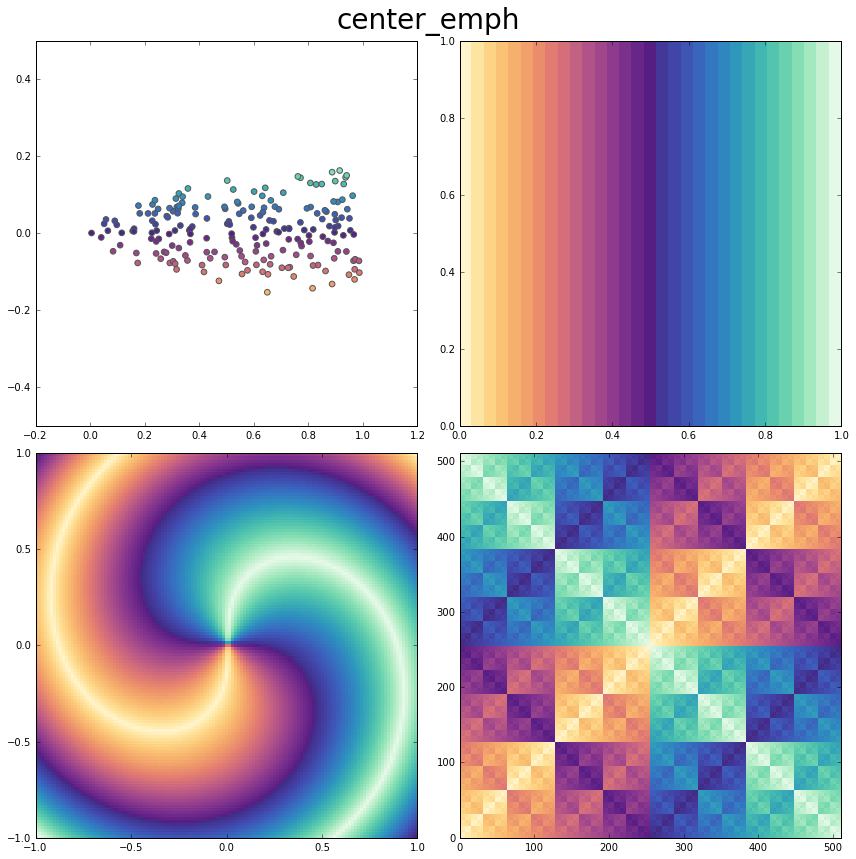

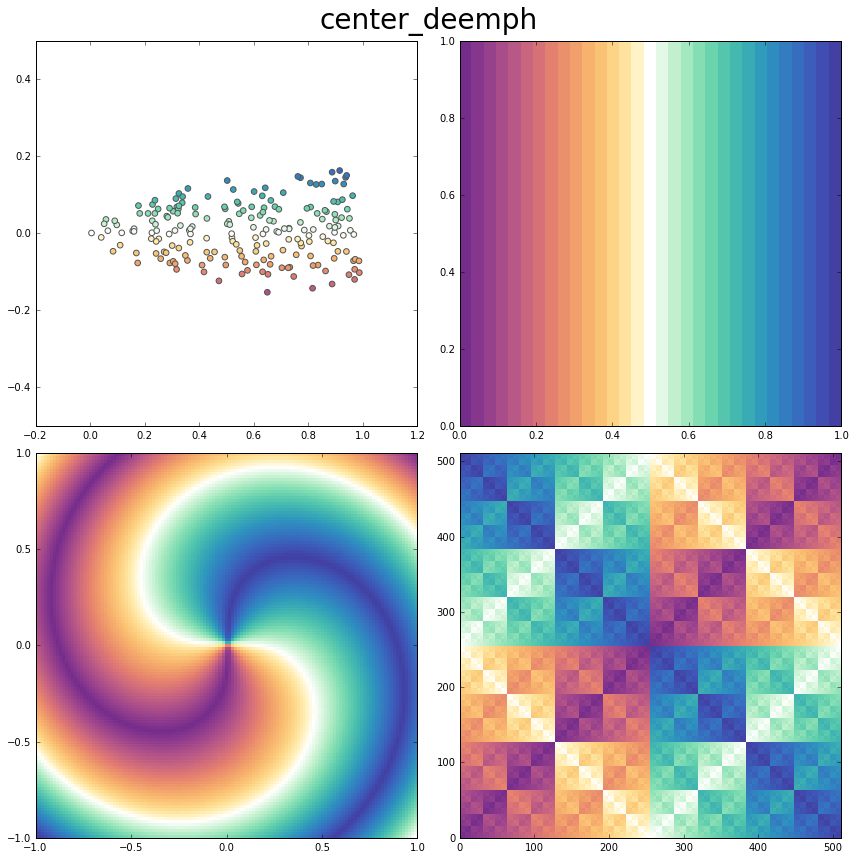

In [5]:
for cmap in [center_emph, center_deemph]:
    fig = testcard(cmap)
    fig.savefig("{}.png".format(cmap.name))